# GROUP 6 PROJECT 
#### Members: Kaylie Nguyen, Chi Pham, Rohan Shan, Max Xu

In [1]:
library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## Introduction

Over the past few years, there has been a high level of inflation. The ideal annual inflation rate according to central banks across the world is 2%. However, throughout 2022, the inflation rate in the United States has been consistently above 7% (above 8% since March). This is due to excess government stimulus, and supply chain issues businesses have been facing since the onset of the COVID-19 pandemic. 

To combat this, the US Federal Reserve has increased its interest rate from 0% all the way to 4% as of November 2022. Despite this, the interest rate is still below the inflation rate, therefore the real interest rate is still negative. Because of this many companies' profits have been hurt with higher costs of production and interest costs. Nevertheless, some companies that produce raw materials (commodities) have seen their revenue increase at a much faster rate than their cost of production. This leads us to the question, does the raw material industry outperform the rest of the market during times of high inflation?

We will begin by dividing up the companies listed in the NYSE Arca, NYSE, and NASDAQ by raw material and non-raw material industries respectively and taking a sample of both. After that, we will do a hypothesis test to compare the mean of the yearly performance rate in both sets of samples to make our conclusion. 


## Preliminary Results

First, we will read the dataset that has already been downloaded from the website as the data on the website is time sensitive. It'll be updated every 10 seconds. The version we're using was downloaded on Oct 30th, 2022.

In [2]:
df <- read.csv("america_2022-10-30-2.csv")
head(df)

,Ticker,Description,Price,Market.Capitalization,Enterprise.Value..MRQ.,Free.Cash.Flow..Annual.YoY.Growth.,EBITDA..Annual.YoY.Growth.,EPS.Diluted..Annual.YoY.Growth.,Gross.Profit..Annual.YoY.Growth.,Net.Income..Annual.YoY.Growth.,Yearly.Performance,Monthly.Performance,Change..,Gross.Margin..TTM.,Operating.Margin..TTM.,Pretax.Margin..TTM.,Net.Margin..TTM.,Industry
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,AAPL,Apple Inc.,155.74,2.477530e+12,2.50888e+12,19.891773,8.573353,8.892056,11.74200,5.410858,3.951408,5.4863181,12.6917511,43.30963,30.288744,30.204043,25.309641,Telecommunications Equipment
2,MSFT,Microsoft Corporation,235.87,1.758287e+12,1.71313e+12,16.092876,21.068848,19.786428,17.05911,18.715216,-27.273568,-0.3969427,1.2752254,68.26000,41.690508,41.740244,34.366121,Packaged Software
3,GOOG,Alphabet Inc.,96.58,1.248046e+12,1.25745e+12,56.412950,66.239223,91.418432,50.12498,88.812734,-34.432685,-1.4690879,0.4472179,55.86563,27.465095,28.003549,23.872310,Internet Software/Services
4,AMZN,"Amazon.com, Inc.",103.41,1.054953e+12,1.25309e+12,-156.804505,22.212676,54.889303,29.27591,56.410857,-39.208047,-9.5908376,-8.4867257,43.04438,2.688021,1.983309,2.254720,Internet Retail
5,TSLA,"Tesla, Inc.",228.52,7.216096e+11,9.05545e+11,83.806713,117.956441,667.843691,105.21870,700.579710,-35.827251,-19.2737036,-13.8473139,26.61261,16.710525,16.524852,14.936618,Motor Vehicles
6,BRK.A,Berkshire Hathaway Inc.,451900.00,6.671907e+11,6.29393e+11,-2.301857,12.738163,122.963852,13.07806,111.178006,3.956099,11.8196929,11.1767166,19.72554,13.559755,4.411983,4.041525,Multi-Line Insurance


Since we're comparing the raw material industry vs the rest of the market, we'll first filter the dataset to see the examples in the raw material industry. Since the industry names are specific, we will have to manually look up the names in the 'industry' column and pick them out.

In [3]:
unique(df["Industry"])

,Industry
,<chr>
1,Telecommunications Equipment
2,Packaged Software
3,Internet Software/Services
4,Internet Retail
5,Motor Vehicles
6,Multi-Line Insurance
7,Managed Health Care
8,Integrated Oil
9,Pharmaceuticals: Major


In [16]:
raw_material <- c("Agricultural Commodities/Milling", "Aluminum","Chemicals: Agricultural","Chemicals: Major Diversified","Chemicals: Specialty",
                 "Coal","Food Distributors","Food: Major Diversified","Food: Meat/Fish/Dairy","Forest Products","Gas Distributors",
                 "Integrated Oil","Oil & Gas Pipelines","Oil & Gas Production","Oil Refining/Marketing","Other Metals/Minerals", "Precious Metals",
                 "Steel","Textiles","Tobacco","Water Utilities")

df <- df %>%
    select(Ticker, Yearly.Performance, Industry) %>%
    mutate(Raw_material = if_else(Industry %in% raw_material, 
                                  TRUE, 
                                  FALSE))     

rmc <- df %>%
        filter(Raw_material) %>%
        select(!Raw_material)

nrmc <- df %>%
        filter(!Raw_material) %>%
        select(!Raw_material)

head(rmc)
head(nrmc)

,Ticker,Yearly.Performance,Industry
,<chr>,<dbl>,<chr>
1,XOM,73.45659668,Integrated Oil
2,CVX,61.30130848,Integrated Oil
3,COP,70.99636950,Oil & Gas Production
4,LIN,-4.62948333,Chemicals: Specialty
5,PM,-2.03282160,Tobacco
6,MO,0.02159827,Tobacco


,Ticker,Yearly.Performance,Industry
,<chr>,<dbl>,<chr>
1,AAPL,3.951408,Telecommunications Equipment
2,MSFT,-27.273568,Packaged Software
3,GOOG,-34.432685,Internet Software/Services
4,AMZN,-39.208047,Internet Retail
5,TSLA,-35.827251,Motor Vehicles
6,BRK.A,3.956099,Multi-Line Insurance


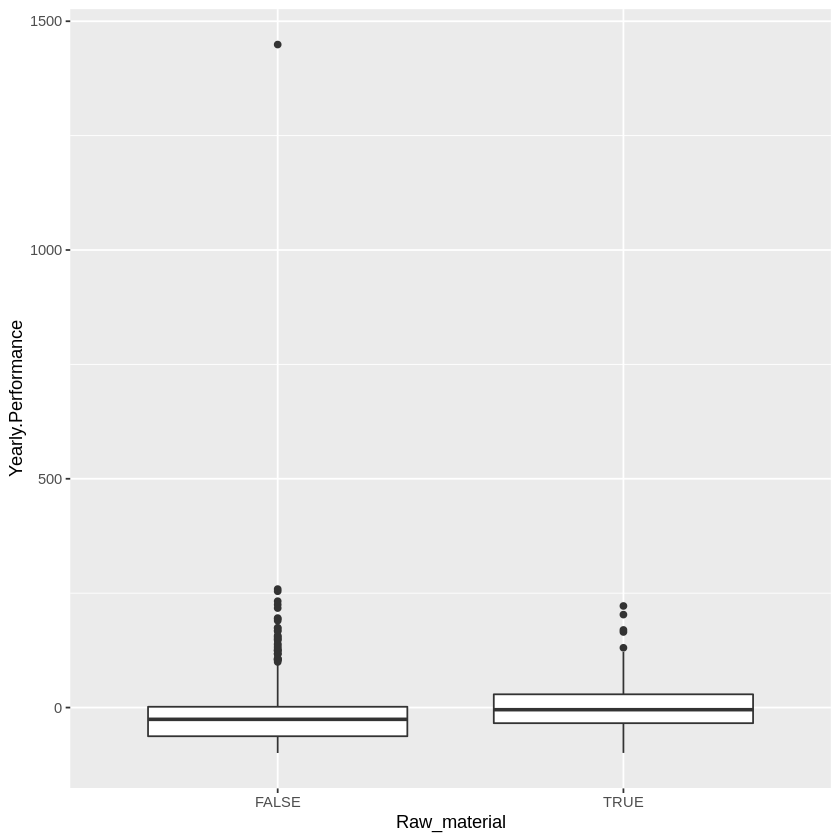

In [17]:
plot <- df %>%
    ggplot()+
    geom_boxplot(aes(x = Raw_material, y = Yearly.Performance))
plot

In [18]:
summary <- df %>%
    group_by(Raw_material)%>%
    summarize(Mean = mean(Yearly.Performance))
summary

Raw_material,Mean
<lgl>,<dbl>
FALSE,-27.854462
TRUE,-1.572574


## Methods: Plan

As we see from the graph above, the median of the yearly perfromance of raw material companies is higher than the non-raw material companies. The mean yearly performance of raw material companies is -1.57% as compared to -27.98% of non-raw material companies. This shows us that the question of commodity companies outperfroming the market during high inflation is a valid one. However, we cannot make conclusions simply based on sample means. This is because these are still samples of only public companies, and are subject to sampling error.

Therefore, we must conduct a hypothesis test at a 5% significance level. Our null hypothesis is that the difference of the means of yearly performance of raw material and non-raw material is 0, and our alternative hypothesis is that the difference is greater than 0. This requires us to calculate the standard deviation of the difference of the two means and then do a Z-test to either reject or fail to reject our null hypothesis. 

Due to the difference in means in our preliminary data, we expect to reject our null hypothesis. If we reject our null hypothesis, it would be an indicator to financial institutions and speculators of how to allocate their investments during inflationary periods. It would also be an indicator of how economies in general have to spend a substantial part of their earnings into basic raw goods to maintain production during inflation. However, the non-commodity industries also include industries that profit from high inflation, so a further investigation could compare industries that are more specific.

## References

https://www.tradingview.com/screener/ (Oct 28)

https://www.rateinflation.com/inflation-rate/usa-inflation-rate/ (Nov 2)

https://www.federalreserve.gov/econres/notes/feds-notes/fiscal-policy-and-excess-inflation-during-covid-19-a-cross-country-view-20220715.html (Nov 3)

https://www.reuters.com/markets/us/fed-set-another-big-rate-hike-may-tamp-down-future-tightening-2022-11-02/ (Nov 3)